In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🖼️ **CIFAR-10 Image Classification with PyTorch** 🖼️

Welcome to the CIFAR-10 Image Classification Project! In this notebook, we will work with the CIFAR-10 dataset, a widely recognized dataset in the field of computer vision. We'll start by understanding the dataset, visualize some of its samples, preprocess the data, and finally, build a Convolutional Neural Network (CNN) using PyTorch to classify the images into 10 different classes. By the end of this notebook, you'll not only have a trained model but also a solid understanding of how to approach image classification tasks using PyTorch. 🚀


## 📊 **Dataset Overview**

The CIFAR-10 dataset is a collection of 60,000 32x32 color images categorized into 10 different classes. Each class contains 6,000 images. The dataset is split into 50,000 training images and 10,000 test images.

### **Classes**

The dataset includes the following 10 classes:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

Each image is small, only 32x32 pixels, and consists of three color channels (RGB). The goal of this project is to correctly classify each image into one of the above classes.
![CIFAR-10 Dataset Example](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

### **Data Collection**

The CIFAR-10 dataset was created by the Canadian Institute for Advanced Research (CIFAR). It is a subset of the larger CIFAR-100 dataset, which contains 100 classes. The images in CIFAR-10 were collected from various sources and are meant to provide a diverse set of images for training and evaluating machine learning models.

### **Usage**

**Benchmarking:** CIFAR-10 is frequently used as a benchmark for evaluating the performance of image classification algorithms.

**Model Training:** It provides a common ground for training models to ensure that results are comparable across different research papers and studies.

**Algorithm Testing:** Researchers use CIFAR-10 to test and validate new algorithms, particularly those related to image recognition and classification.


## 🔖 **Notable Works and References**

- **"Learning Multiple Layers of Features from Tiny Images"** by *Alex Krizhevsky* (2009): This is the foundational paper introducing CIFAR-10 and CIFAR-100 datasets. It provides details on the dataset creation and initial experiments. [Link to paper](https://www.semanticscholar.org/paper/Learning-Multiple-Layers-of-Features-from-Tiny-Krizhevsky/5d90f06bb70a0a3dced62413346235c02b1aa086)

- **"ImageNet Classification with Deep Convolutional Neural Networks"** by *Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton* (2012): While primarily focused on ImageNet, this paper introduced deep CNNs that have been applied to CIFAR-10 for performance comparisons.[Link to paper](https://www.semanticscholar.org/paper/ImageNet-classification-with-deep-convolutional-Krizhevsky-Sutskever/abd1c342495432171beb7ca8fd9551ef13cbd0ff)

- **"Deep Residual Learning for Image Recognition"** by *Kaiming He, Xiangyu Zhang, Shaoqing Ren*, and *Jian Sun* (2015): Introduces the ResNet architecture, which has been tested on CIFAR-10 among other datasets. [Link to paper](https://www.semanticscholar.org/paper/Deep-Residual-Learning-for-Image-Recognition-He-Zhang/2c03df8b48bf3fa39054345bafabfeff15bfd11d)

- "**Wide Residual Networks**" by *Sergey Zagoruyko* and* Nikos Komodakis* (2016): This paper extends ResNet architectures and evaluates performance on CIFAR-10. [Link to paper](https://www.semanticscholar.org/paper/Wide-Residual-Networks-Zagoruyko-Komodakis/1c4e9156ca07705531e45960b7a919dc473abb51)


**CIFAR-10 Dataset on Kaggle:** Kaggle provides a version of the CIFAR-10 dataset along with kernels and notebooks for analysis. [Link to Kaggle Dataset](https://www.kaggle.com/datasets/petitbonney/cifar10-image-recognition)


## 🎨 **Data Visualization**

Before diving into model training, it's important to familiarize yourself with the dataset. Visualizing some of the images will help us understand the diversity and complexity of the data. We'll load the dataset using PyTorch's `torchvision` library, which provides convenient utilities for handling common image datasets.
In the CIFAR-10 dataset, the correspondence between images and their labels is maintained through a specific structure in the dataset files. Here’s a detailed explanation of how this works:

## **Structure of CIFAR-10 Dataset**
- *Image Data Files*: The CIFAR-10 dataset is divided into multiple files containing the image data and their corresponding labels.
For training data, these files are named data_batch_1, data_batch_2, ..., data_batch_5. Each of these files contains a batch of images and their labels.
- *Label Mapping*: The batches.meta file provides class names but does not directly link to specific images. It only contains the names of the classes.

## **Files and Their Contents**
- *data_batch_X (Training Data)*: Contains 10,000 images and their labels.
Each image is represented as a flat array of 3072 values (32x32x3 for RGB).
- *test_batch (Test Data)*: Contains 10,000 images and their labels, similar to the training data files.
- *batches.meta:* Contains metadata, including the list of class names.

In [2]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 💡 Explanation:
# - `torch`: The core library for PyTorch, a deep learning framework.
# - `torchvision`: A PyTorch library containing utilities for common datasets, model architectures, and image transformations.
# - `torchvision.transforms`: A module that provides various image transformations, such as normalization and augmentation.
# - `matplotlib.pyplot`: A plotting library used for visualizing images and graphs.
# - `numpy`: A library for numerical computing in Python, often used for handling arrays.

# Define the transformations to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images with mean and std dev
])

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((128, 128)),  # Example resizing
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Download and load the CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# Define the class names
classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 79711288.89it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


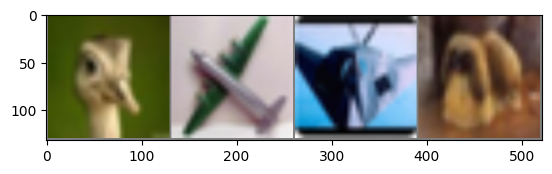

bird                            airplane                            airplane                            dog


In [3]:
# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    # plt.figure(figsize=(10, 10))  # Adjust figure size
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show the images
imshow(torchvision.utils.make_grid(images))

# Print the class names for each image
print('                            '.join(f'{classes[labels[j]]}' for j in range(4)))

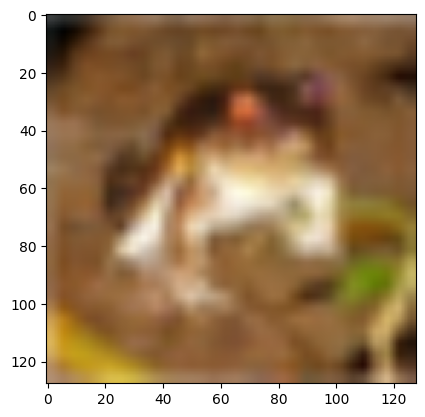

In [4]:
# Get a sample image from the dataset and vizualize it
image, label = trainset[0]

# Display the image
imshow(image)

Number of images in batch: 10000
Number of labels in batch: 10000
First image label: 6


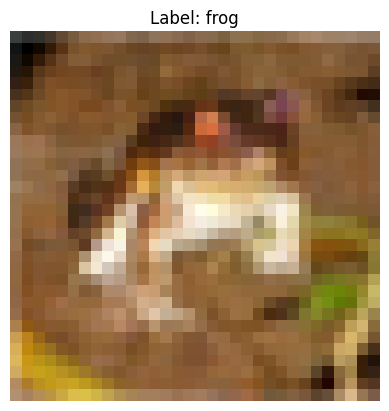

In [5]:
# Function to unpickle the files inside the dataset
def unpickle(file):
    """Load a CIFAR-10 batch file."""
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

# Load a CIFAR-10 batch file (e.g., 'data_batch_1')
batch_file = '/content/data/cifar-10-batches-py/data_batch_1'
batch_data = unpickle(batch_file)

# Extract data and labels
images = batch_data['data']
labels = batch_data['labels']
class_names = unpickle('/content/data/cifar-10-batches-py/batches.meta')['label_names']

# Convert image data to the shape (num_images, 32, 32, 3)
images = np.reshape(images, (-1, 3, 32, 32))
images = np.transpose(images, (0, 2, 3, 1))  # Convert from (N, C, H, W) to (N, H, W, C)

# Print information about the batch
print(f'Number of images in batch: {len(images)}')
print(f'Number of labels in batch: {len(labels)}')

# Print the first image and its label
first_image = images[0]
first_label = labels[0]
print(f'First image label: {first_label}')

# Display the first image
plt.imshow(first_image)
plt.title(f'Label: {class_names[first_label]}')
plt.axis('off')
plt.show()


In [6]:
# Exploring the training set of the CIFAR-10 dataset
# Get the class names
class_names = trainset.classes
print(f'Class names: {class_names}')

# Count the number of images in each class
class_counts = {class_name: 0 for class_name in class_names}

for _, label in trainset:
    class_name = class_names[label]
    class_counts[class_name] += 1

print(f'Number of images per class:')
for class_name, count in class_counts.items():
    print(f'{class_name}: {count}')

# Get the total size of the dataset
total_size = len(trainset)
print(f'Total number of images in the training dataset: {total_size}')

Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Number of images per class:
airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000
Total number of images in the training dataset: 50000


In [7]:
# Exploring the testing set of the CIFAR-10 dataset
# Get the class names
class_names = testset.classes
print(f'Class names: {class_names}')

# Count the number of images in each class
class_counts = {class_name: 0 for class_name in class_names}

for _, label in testset:
    class_name = class_names[label]
    class_counts[class_name] += 1

print(f'Number of images per class:')
for class_name, count in class_counts.items():
    print(f'{class_name}: {count}')

# Get the total size of the dataset
total_size = len(testset)
print(f'Total number of images in the training dataset: {total_size}')

Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Number of images per class:
airplane: 1000
automobile: 1000
bird: 1000
cat: 1000
deer: 1000
dog: 1000
frog: 1000
horse: 1000
ship: 1000
truck: 1000
Total number of images in the training dataset: 10000


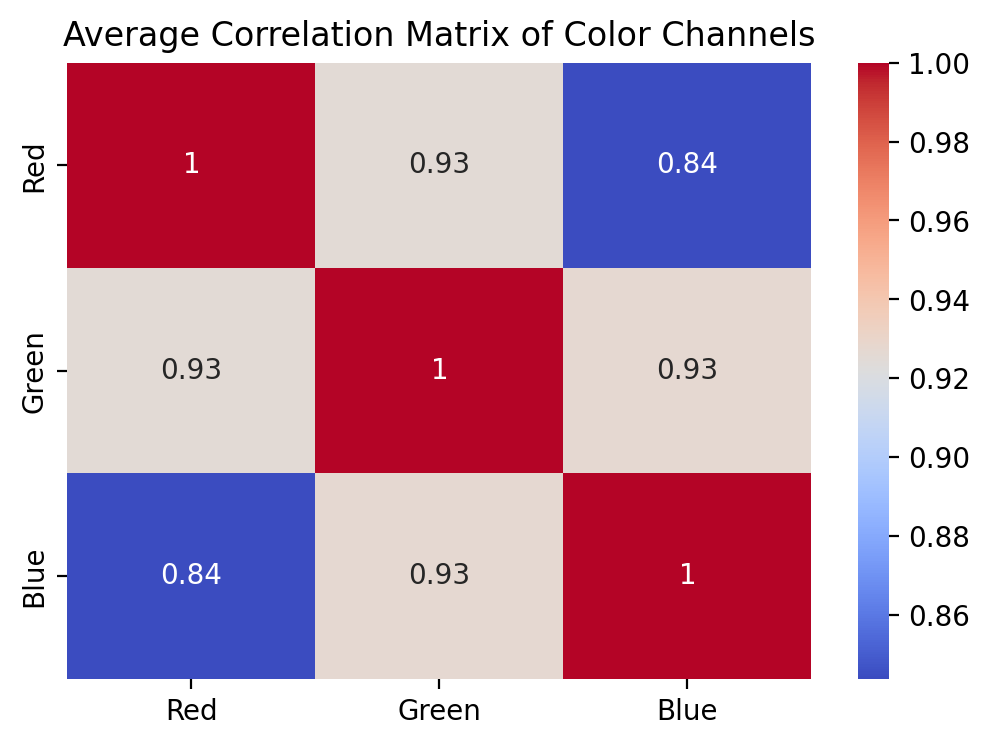

In [8]:
import seaborn as sns
# In RGB images, the correlation matrix helps to analyze how the color channels (Red, Green, Blue) are related to each other.
# For example, high correlation between channels might indicate that changes in one channel often correspond to changes in another, which can be useful for understanding color distributions and potential redundancies in the data.
# Calculate correlations between color channels
correlations = []
for img, _ in trainset:
    img_np = img.numpy()
    img_flat = img_np.reshape(3, -1)
    corr_matrix = np.corrcoef(img_flat)
    correlations.append(corr_matrix)

# Average correlation matrix
avg_corr_matrix = np.mean(correlations, axis=0)

# Plot the correlation matrix
plt.figure(figsize=(6, 4),dpi=200)
sns.heatmap(avg_corr_matrix, annot=True, cmap='coolwarm', xticklabels=['Red', 'Green', 'Blue'], yticklabels=['Red', 'Green', 'Blue'])
plt.title('Average Correlation Matrix of Color Channels')
plt.show()


In [9]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download and load the CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## 🧠 **Modeling and Evaluation**

In this section, we'll build a Convolutional Neural Network (CNN) using PyTorch. CNNs are especially powerful for image classification tasks because they are designed to automatically and adaptively learn spatial hierarchies of features, from low- to high-level patterns.

We'll start by defining our network architecture, followed by setting up the loss function and optimizer. We'll then train the model on the CIFAR-10 dataset and evaluate its performance.
To build our model we are using a convolutional neural network architecture as described below:

- **Input Layer:** Accepts RGB images of size 32x32 pixels.

- **Convolutional Layer 1**: Applies 6 convolutional filters of size 5x5 to the input image, followed by ReLU activation. This layer extracts basic features such as edges and textures.

-** Max-Pooling Layer 1:** Reduces the spatial dimensions of the feature maps from the first convolutional layer using a 2x2 pooling window with a stride of 2, which helps in downsampling the feature maps and reducing computational complexity.

- **Convolutional Layer 2:** Applies 16 convolutional filters of size 5x5 to the pooled feature maps, followed by ReLU activation. This layer extracts more complex features from the image.

- **Max-Pooling Layer 2:** Further reduces the spatial dimensions of the feature maps from the second convolutional layer using another 2x2 pooling window with a stride of 2.

- **Fully Connected Layer 1:** Connects the output of the second pooling layer to 120 neurons, followed by ReLU activation. This layer helps in learning high-level representations.

- **Fully Connected Layer 2:** Connects 120 neurons to 84 neurons, followed by ReLU activation. It further refines the feature representation.

- **Fully Connected Layer 3:** Connects 84 neurons to 10 output neurons, corresponding to the 10 classes in the CIFAR-10 dataset.

- **Softmax Layer:** Computes the probabilities for each of the 10 classes, providing the final classification output along with the loss value during training.

This architecture leverages convolutional and pooling layers to extract and refine features from images, followed by fully connected layers to perform classification.

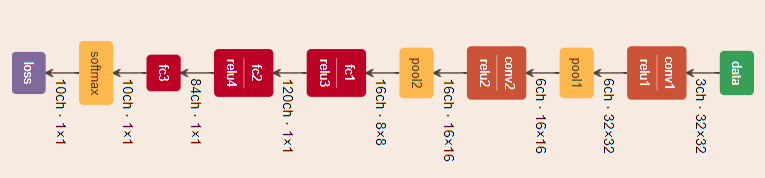

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 💡 Explanation:
# - `torch.nn`: A module that provides layers and loss functions for building neural networks.
# - `torch.nn.functional`: Contains functions that operate on tensors, like activation functions.
# - `torch.optim`: A module that implements optimization algorithms like SGD, Adam, etc.

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Convolutional layer 1: Input channels = 3, output channels = 6, kernel size = 5x5
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max-pooling layer 1: Kernel size = 2x2
        self.pool = nn.MaxPool2d(2, 2)
        # Convolutional layer 2: Input channels = 6, output channels = 16, kernel size = 5x5
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully connected layer 1: Input features = 16*5*5, output features = 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Fully connected layer 2: Input features = 120, output features = 84
        self.fc2 = nn.Linear(120, 84)
        # Fully connected layer 3: Input features = 84, output features = 10 (number of classes)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Pass input through conv1, apply ReLU activation, then max-pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Pass through conv2, apply ReLU activation, then max-pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Pass through the first fully connected layer and apply ReLU
        x = F.relu(self.fc1(x))
        # Pass through the second fully connected layer and apply ReLU
        x = F.relu(self.fc2(x))
        # Output layer with raw values (logits)
        x = self.fc3(x)
        return x

# Instantiate the network
net = Net()

# Define the loss function (Cross-Entropy Loss)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent with momentum)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 💡 Explanation:
# - `nn.CrossEntropyLoss`: A common loss function for multi-class classification problems.
# - `optim.SGD`: A stochastic gradient descent optimizer, which updates the model parameters based on the gradients computed during backpropagation.
# - `lr`: Learning rate, a key hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.
# - `momentum`: Helps accelerate gradients vectors in the right directions, thus leading to faster converging.


### 🚀 **Training the Model**

We'll now train the model on the training dataset. This involves multiple epochs, where in each epoch, the model makes predictions on the training data, calculates the loss, computes the gradients, and updates the weights to minimize the loss.


[Epoch 1, Mini-batch 2000] loss: 1.437
[Epoch 1, Mini-batch 4000] loss: 1.470
[Epoch 1, Mini-batch 6000] loss: 1.497
[Epoch 1, Mini-batch 8000] loss: 1.556
[Epoch 1, Mini-batch 10000] loss: 1.579
[Epoch 1, Mini-batch 12000] loss: 1.594
[Epoch 2, Mini-batch 2000] loss: 1.368
[Epoch 2, Mini-batch 4000] loss: 1.429
[Epoch 2, Mini-batch 6000] loss: 1.473
[Epoch 2, Mini-batch 8000] loss: 1.526
[Epoch 2, Mini-batch 10000] loss: 1.558
[Epoch 2, Mini-batch 12000] loss: 1.575
[Epoch 3, Mini-batch 2000] loss: 1.384
[Epoch 3, Mini-batch 4000] loss: 1.389
[Epoch 3, Mini-batch 6000] loss: 1.436
[Epoch 3, Mini-batch 8000] loss: 1.473
[Epoch 3, Mini-batch 10000] loss: 1.496
[Epoch 3, Mini-batch 12000] loss: 1.584
[Epoch 4, Mini-batch 2000] loss: 1.324
[Epoch 4, Mini-batch 4000] loss: 1.385
[Epoch 4, Mini-batch 6000] loss: 1.359
[Epoch 4, Mini-batch 8000] loss: 1.497
[Epoch 4, Mini-batch 10000] loss: 1.485
[Epoch 4, Mini-batch 12000] loss: 1.547
[Epoch 5, Mini-batch 2000] loss: 1.270
[Epoch 5, Mini-ba

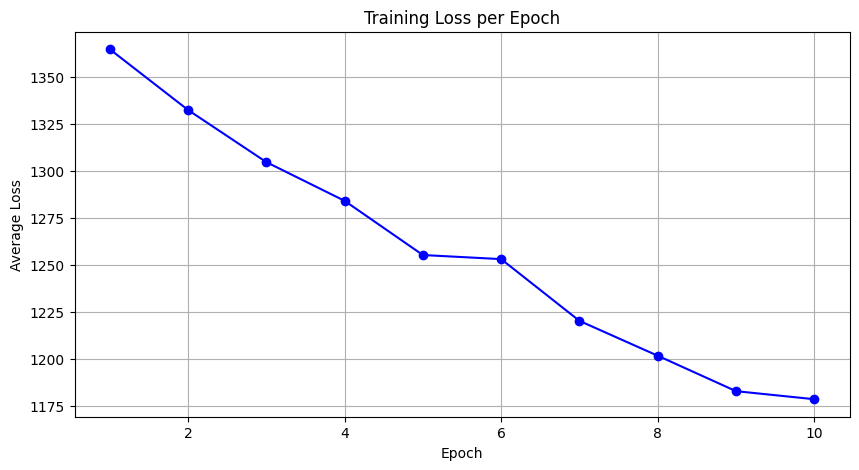

In [15]:
# Lists to store the loss values for plotting
epoch_losses = []
# Training the network
for epoch in range(10):  # loop over the dataset multiple times (2 epochs for demonstration)

    running_loss = 0.0
    epoch_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = net(inputs)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Accumulate running and epoch losses
        running_loss += loss.item()
        epoch_loss += loss.item()
        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print(f'[Epoch {epoch + 1}, Mini-batch {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Average loss for the current epoch
    epoch_losses.append(epoch_loss / (i // 2000 + 1))
print('Finished Training')
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

### 🔍 **Evaluating the Model**

Once the model is trained, we need to evaluate its performance on the test dataset. This will give us an idea of how well the model generalizes to new, unseen data.


In [12]:
correct = 0
total = 0
with torch.no_grad():  # Disables gradient calculation, useful for inference
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the class with the highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10,000 test images: 62.04%


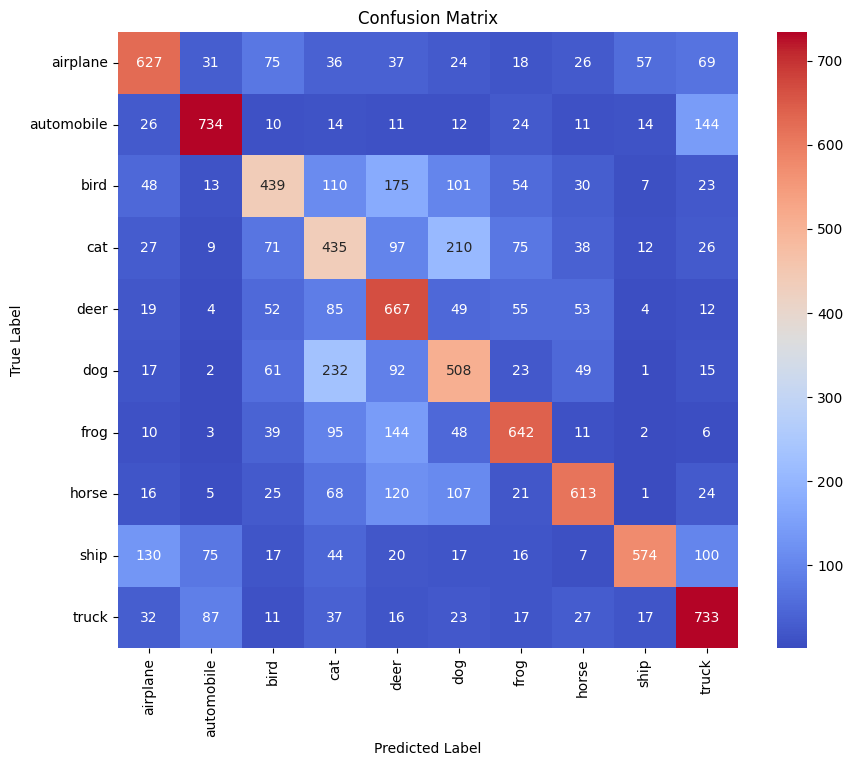

In [16]:
# Initialize lists to store true labels and predictions
all_labels = []
all_preds = []

# Disables gradient calculation, useful for inference
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the class with the highest probability

        # Append true labels and predictions
        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=range(10))

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## ✅ **Conclusion and Model Saving**

We have successfully trained a Convolutional Neural Network to classify images in the CIFAR-10 dataset. Finally, let's save the trained model so that it can be reused later for inference or further training.


In [17]:
# Save the trained model
PATH = '/content/drive/MyDrive/Colab Notebooks/Cifar-10 Image Classification/cifar10_cnn.pth'
torch.save(net.state_dict(), PATH)

print(f'Model saved to {PATH}')

Model saved to /content/drive/MyDrive/Colab Notebooks/Cifar-10 Image Classification/cifar10_cnn.pth


### 📦 **Loading the Saved Model**

Later, if you need to load the model for inference or further training, you can do so using the following code:

```python
# Create a new instance of the network and load the saved state
net = Net()
net.load_state_dict(torch.load(PATH))
